# Python operations

In [27]:
# Initial code from the lab instructions
a1=1; a2=2;
u1=5; u2=4;
f=[a1*u1*u2, a2*u1/u2]
print(f)

[20, 2.5]


In [28]:
# Modifying it to change the results
# Expecting output (40, 2.5) by only changing a1 to 2
a1=2
f=[a1*u1*u2, a2*u1/u2]
print(f)

[40, 2.5]


In [29]:
# Initial code from the lab instructions
b1=4; b2=1;
v1=-2; v2=3;
g=[1/(1+b1*v1**2), 1/(1+b2*v2**2)]
print(g)

[0.058823529411764705, 0.1]


In [30]:
# Modifying b2 to 1
# Expecting output to change so that the second element 
# in the ouput vector is smaller than before
b2=2
g=[1/(1+b1*v1**2), 1/(1+b2*v2**2)]
print(g)

[0.058823529411764705, 0.05263157894736842]


In [31]:
# Matrices
ua=[[5,4],[1,2]]
print(ua)
print(ua[0][1])

[[5, 4], [1, 2]]
4


In [32]:
# Creating a 3x3 identity matrix just to try out matrices a bit more
I = [[1, 0], [0, 1]]
# Check the diagonals
print(I[0][0], I[1][1])

1 1


### Comment:
Having tried out some of the basic python functions, I can tell that they're a bit limited. Because of this, we are going to download the library NumPy.

# NumPy

In [33]:
# Importing numpy
import numpy as np

print('pi is', np.pi)
print('cos(pi) is', np.cos(np.pi))

pi is 3.141592653589793
cos(pi) is -1.0


In [34]:
# Importing specific parts of numpy
from numpy import cos, pi
print('cos(pi) is', cos(pi))

cos(pi) is -1.0


In [35]:
# Trying some more numpy functions
print(np.mod(2, 5)) # 2 % 5
print(np.cos(2*pi)) # Cosine of a circle
print(np.arcsin(1)) # Inverse sine function

2
1.0
1.5707963267948966


In [36]:
# More complicated function
c1=1; c2=2;
w1=5; w2=4;
h=np.exp(-c1*w1-c2*w2)
print(h)

2.2603294069810542e-06


### Comment:
NumPy is a very useful library with all kinds of mathematical operations included. Another useful package for dealing with data is matplotlib. I'm going to import it just because I want to use it's functions for the last task.

In [37]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Defining functions

In [38]:
# Example function for string manipulation
def process_string(str):
    t = str.strip()
    return t[0].upper()+t[1:]

In [39]:
# Testing the function
test_string = "   hello there"
string_mod = process_string(test_string)
print('Original string: ', test_string)
print('String modified by the function: ', string_mod)

Original string:     hello there
String modified by the function:  Hello there


In [40]:
# Function relating to Topic 2 in Discussion 1
def f(u,a):
    a1=a[0]; a2=a[1]; u1 = u[0]; u2=u[1]
    return [a1*u1*u2, a2*u1/u2]

In [41]:
# Applying the function
print(ua)
u=ua[0]; a=ua[1]
print(f(u,a))

[[5, 4], [1, 2]]
[20, 2.5]


### Comment:
Functions are very useful to be able to repeat calculations without to much redundant code. Furthermore, we've clearly found a neat way to deal with input vectors and output vectors for functions. This will come in very handy for the rest of the course.

# Task 1

In [42]:
# Creating the mean vector (parameter mu)
mu = [2, -3]

# Creating a diagonal covariance matrix (parameter sigma)
Sigma = [[1, 0], [0, 10]]

# Creating X (generating 500 data from the specified distribution)
X = np.random.multivariate_normal(mu, Sigma, 500)

# Checking the shape and top of the X matrix
print(X.shape)
print(X[0:4,:])

# Calulating the mean for each column (each x)
print([sum(X[:,1]/500), sum(X[:,0])/500])

# Utilizing the mean function from numpy, which correspond to our ML estimator of mu
barX = np.mean(X, axis = 0)
print(barX)

# Calculating and checking the covariance matrix
S = np.cov(np.transpose(X))

(500, 2)
[[ 3.15618578  2.55937434]
 [ 2.03100877  0.14443737]
 [ 0.09472243 -3.81150137]
 [ 1.11733546 -5.74313561]]
[-2.857059793229891, 2.0675528839605133]
[ 2.06755288 -2.85705979]


(500,)
[-5.20288454 -3.4840247  -4.83713764 -3.7549576 ]
-1975.6976506019619


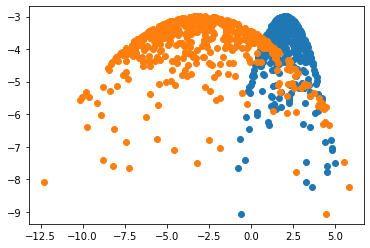

In [43]:
from scipy.stats import multivariate_normal

# Evaluating the probability density function for the values in X
# and then taking the log of that calculation
ll = np.log(multivariate_normal.pdf(X, mean = mu, cov = Sigma))

print(ll.shape)
print(ll[0:4])

# Finally summing over the pdf values
y = np.sum(ll)
print(y)

# Plotting the pdf to more clearly see where they are maximized
plt.plot(X, ll, 'o')
plt.show()

-1973.4821319207504


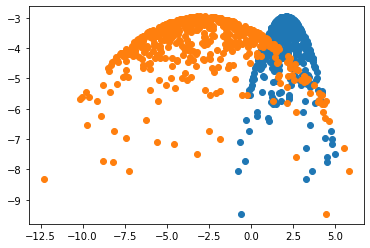

In [45]:
# Same procedure with our point estimators
hatll = np.log(multivariate_normal.pdf(X, mean = barX, cov = S))
haty = np.sum(hatll)
print(haty)

plt.plot(X, hatll, 'o')
plt.show()

*Comment*:
Like we can see above, the ML estimator is very good - close to the real parameters. 